# Taller 1 – Bases Matemáticas y Programación en Python para Sistemas Dinámicos  
**Trabajo en grupos de 5 personas**  

**Objetivo:** Familiarizarse con las herramientas matemáticas y computacionales necesarias para abordar el resto del curso.
o.


In [1]:
#Importacion de librerias necesarias
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy import Matrix
from sympy import symbols, diff
from scipy.integrate import odeint
from sympy import *

## 1. Derivadas parciales y jacobianos con SymPy

Considere la función:

$$
f(x,y) = \sin(xy) + e^x \cos(y)
$$

1. Calcular **a mano** las derivadas parciales $\frac{\partial f}{\partial x}$ y $\frac{\partial f}{\partial y}$.
2. Usar **SymPy** para confirmar los resultados.
3. Construir la **matriz jacobiana** de:

$$
F(x,y) = (f(x,y), \, xy^2)
$$
, \, xy^2)
$$
 \, xy^2)
\]


In [2]:

x, y = sp.symbols('x y')
f = sp.sin(x*y) + sp.exp(x)*sp.cos(y)
print(sp.diff(f, x))
print(sp.diff(f, y))



y*cos(x*y) + exp(x)*cos(y)
x*cos(x*y) - exp(x)*sin(y)


## 2. Series y progresiones

Sea la serie definida por:

$$
a_n = 3n - 2
$$

1. Escribir en Python una función que calcule el término $n$-ésimo y la **suma de los primeros $n$** términos de la serie anterior (progresión aritmética).

Definir otra serie geométrica:

$$
b_n = 5 \cdot \left(\frac{1}{2}\right)^{n-1}
$$

2. Calcular el término $n$-ésimo y la suma de los primeros $n$ términos.
3. Generar y graficar los primeros **20 términos** de ambas series en la misma figura.
4. Comparar visualmente las diferencias de crecimiento o decrecimiento entre ambas series.



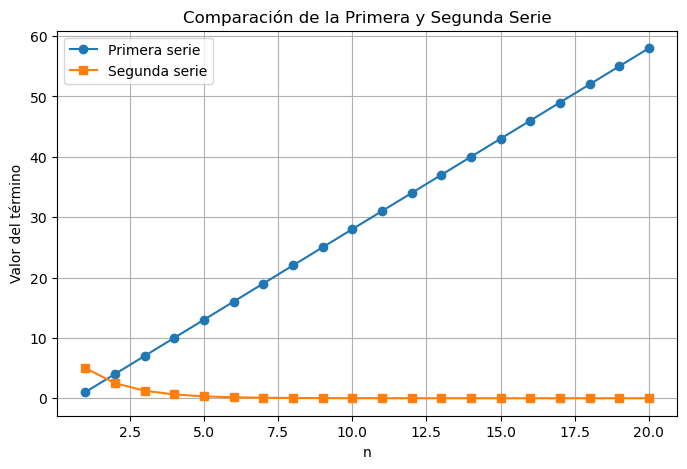

In [3]:
def primera_n(n):
    return 3*n - 2

def suma_primera(n):
    return n * (primera_n(1) + primera_n(n)) / 2

def segunda_n(n):
    return 5 * (0.5)**(n-1)

def suma_segunda(n):
    r = 0.5
    return 5 * (1 - r**n) / (1 - r)

n_val = np.arange(1, 21)
primera_terms = [primera_n(i) for i in n_val]
segunda_terms = [segunda_n(i) for i in n_val]

plt.figure(figsize=(8,5))
plt.plot(n_val, primera_terms, 'o-', label='Primera serie')
plt.plot(n_val, segunda_terms, 's-', label='Segunda serie')
plt.title('Comparación de la Primera y Segunda Serie')
plt.xlabel('n')
plt.ylabel('Valor del término')
plt.legend()
plt.grid(True)
plt.show()

## 3. Álgebra lineal y autovalores

Considere el sistema lineal:

$$
\frac{dX}{dt} = AX, \quad A = \begin{pmatrix}4 & -2 \\ 1 & 1\end{pmatrix}
$$

1. Calcular analíticamente los **autovalores** y **autovectores** de $A$.
2. Usar **SymPy** para confirmar los resultados.
3. Escribir la solución general del sistema usando la **descomposición espectral**.


In [4]:
# Definir la matriz
A = sp.Matrix([[4, -2],
               [1,  1]])

# Calcular valores propios
valores_propios = A.eigenvals()
print(valores_propios)

# Calcular vectores propios
vectores_propios = A.eigenvects()
print(vectores_propios)

{3: 1, 2: 1}
[(2, 1, [Matrix([
[1],
[1]])]), (3, 1, [Matrix([
[2],
[1]])])]


## 4. Resolución simbólica y numérica de un sistema lineal de EDOs

Resolver el sistema:

$$
\frac{dx}{dt} = -3x + 4y, \quad \frac{dy}{dt} = -4x - 3y
$$

1. Resolver **analíticamente** usando SymPy.
2. Resolver **numéricamente** con SciPy en el intervalo $t \in [0,5]$ con condiciones iniciales $(x_0, y_0) = (1,0)$.
3. Graficar las soluciones $x(t)$ y $y(t)$.


In [5]:
x, y = symbols('x y')
f = -3 * x + 4 * y
f_dif = diff(f, x)
print(f_dif)

-3


In [6]:
f = -4 * x - 3 * y
f_dif = diff(f, y)
print(f_dif)

-3


Solución en t=10.00: x=0.00, y=0.00


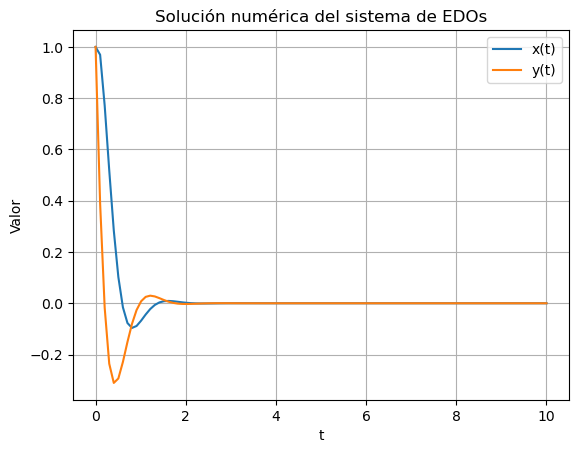

In [7]:
# Ecuación diferencial
def modelo(Y, t):
    x = Y[0]
    y = Y[1]
    dxdt = -3*x + 4*y
    dydt = -4*x - 3*y
    return [dxdt, dydt]

# Condición inicial
# t0, tf, y0, and t are already defined in previous cells
# Suponiendo que y0 y t están definidos
y0 = [1, 1]  # Ejemplo de condición inicial [x0, y0]
t = np.linspace(0, 10, 100) # Ejemplo de vector de tiempo

# Resolver el sistema de ecuaciones diferenciales
sol = odeint(modelo, y0, t)

x_sol = sol[:, 0]
y_sol = sol[:, 1]

print(f"Solución en t={t[-1]:.2f}: x={x_sol[-1]:.2f}, y={y_sol[-1]:.2f}")

# Graficar la solución
plt.figure()
plt.plot(t, x_sol, label="x(t)")
plt.plot(t, y_sol, label="y(t)")
plt.xlabel("t")
plt.ylabel("Valor")
plt.title("Solución numérica del sistema de EDOs")
plt.legend()
plt.grid(True)
plt.show()

## 5. Sistema no lineal simbólico

Considere el sistema:

$$
\frac{dx}{dt} = \sin(y) - x^2, \quad \frac{dy}{dt} = x e^{-y}
$$

1. Calcular el **jacobiano simbólicamente** usando SymPy.
2. Evaluar el jacobiano en el punto $(x,y) = (1,0)$.
3. Discutir brevemente en grupo qué podría implicar la forma de esta matriz (sin entrar en estabilidad).


In [8]:
#Definir variables simbolicas
x,y=sp.symbols('x,y', real=True)

f_1 = sin(y) - x**2
f_2 = x * exp(-y)

# Crear el vector de funciones F
F = Matrix([f_1, f_2])

# Calcular el jacobiano
J = F.jacobian([x, y])

print("Jacobiano Simbólico",J)

J_punto = J.subs({x: 1, y: 0})

print("Jacobiano en el punto",J_punto)



Jacobiano Simbólico Matrix([[-2*x, cos(y)], [exp(-y), -x*exp(-y)]])
Jacobiano en el punto Matrix([[-2, 1], [1, -1]])


## 6. Resolución numérica de un sistema no lineal

Considere el sistema:

$$
\frac{dx}{dt} = y, \quad \frac{dy}{dt} = -x - 0.5y^3
$$

1. Implementar una función en Python que calcule el **campo vectorial**.
2. Resolver numéricamente con condiciones iniciales $(x_0, y_0) = (1,0)$ en el intervalo $t \in [0,20]$.
3. Graficar la trayectoria en el **espacio de fases** $(x, y)$.


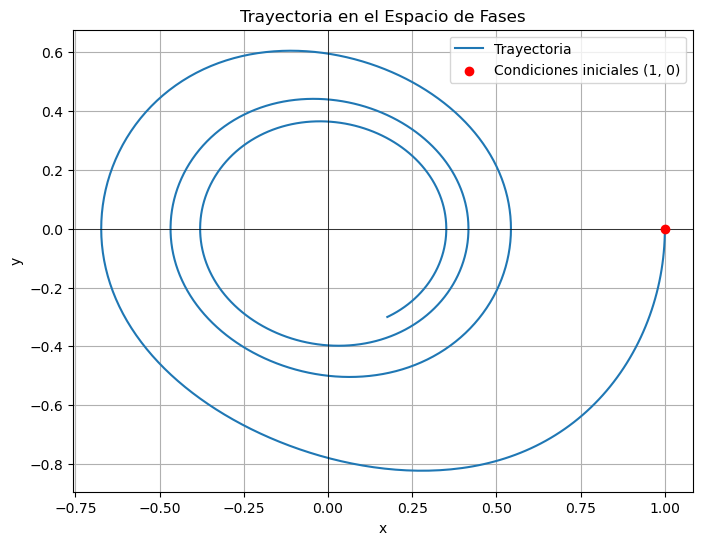

In [9]:
#Definir variables simbolicas
t, x, y = sp.symbols('t x y')

dxdt_simbolico = y
dydt_simbolico = -x - 0.5 * y**3

def campo_vectorial_simbolico(variables, tiempo):

    x_val, y_val = variables

    # Pasamso a numericos para el calculo
    f_dxdt = sp.lambdify((x, y), dxdt_simbolico, 'numpy')
    f_dydt = sp.lambdify((x, y), dydt_simbolico, 'numpy')
    
    dxdt_num = f_dxdt(x_val, y_val)
    dydt_num = f_dydt(x_val, y_val)
    
    return [dxdt_num, dydt_num]


CI = [1, 0]

# Intervalo de tiempo
t_intervalo = np.linspace(0, 20, 1000)
solucion = odeint(campo_vectorial_simbolico,CI, t_intervalo)

# Separar las variables x e y de la solución
x_solucion = solucion[:, 0]
y_solucion = solucion[:, 1]

# 3. Graficar la trayectoria en el espacio de fases (x, y).
plt.figure(figsize=(8, 6))
plt.plot(x_solucion, y_solucion, label='Trayectoria')
plt.scatter(CI[0], CI[1], color='red', zorder=5, label='Condiciones iniciales (1, 0)')
plt.title('Trayectoria en el Espacio de Fases')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()


## 7. Convergencia de series

Considerar la serie infinita:

$$
S = \sum_{n=1}^{\infty} \frac{(-1)^{n+1}}{n}
$$

1. Usar Python para calcular la suma parcial $S_N$ para $N = 5, 10, 50, 100, 500, 1000$.
2. Graficar $S_N$ en función de $N$ y observar su comportamiento.
3. Discutir si la serie converge o diverge, mencionando el criterio utilizado.

Repetir para la serie:

$$
T = \sum_{n=1}^{\infty} \frac{1}{n}
$$

y **comparar** con el caso anterior.


## 8. Manipulación de datos y gráficos

Generar una serie temporal:

$$
x(t) = e^{-0.1t} \cos(2t), \quad t \in [0,20]
$$

1. Calcular derivada y segunda derivada simbólicamente con SymPy.
2. Evaluar la función y sus derivadas en **50 puntos** y guardarlos en un **DataFrame** de pandas.
3. Graficar $x(t)$, $x'(t)$ y $x''(t)$ en la misma figura.


## 9. Combinación de simbólico y numérico

Considere la ecuación diferencial:

$$
\frac{d^2x}{dt^2} + 4 \frac{dx}{dt} + 5x = 0
$$

1. Resolver **analíticamente** con SymPy.
2. Resolver **numéricamente** usando SciPy y comparar las gráficas.
3. Discutir posibles fuentes de diferencia entre ambas soluciones.


Eq(x(t), (C1*sin(t) + C2*cos(t))*exp(-2*t))
Eq(x(t), (C1*sin(t) + C2*cos(t))*exp(-2*t))


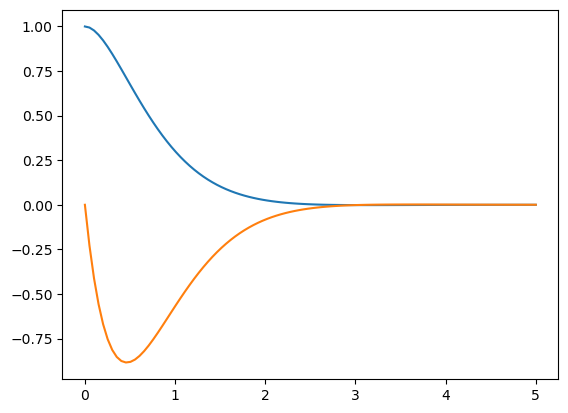

In [10]:

"""
Resolver analíticamente con Sympy
"""

# Opcion 1
t= sp.Symbol('t')
x= sp.Function('x')

ed= sp.Eq(x(t).diff(t,t)+4*x(t).diff(t)+5*x(t),0)
solucion= sp.dsolve(ed)
print(solucion)

# Opcion 2
t= sp.Symbol('t')
x= sp.Function('x')(t)

segundo_orden= sp.Derivative(x,t,2)
primer_orden= sp.Derivative(x,t)

ed= sp.Eq(segundo_orden+4*primer_orden+5*x,0)
solucion= sp.dsolve(ed)
print(solucion)

"""
Resolver numéricamente con SciPy
"""

# Condiciones iniciales
condiciones_iniciales= [1,0]
def modelo (x,t):
    x1, x2= x
    dx1= x2
    dx2= -4*x2-5*x1
    return dx1, dx2

vector_de_tiempo= np.linspace(0,5,100)
solucion= odeint(modelo,condiciones_iniciales,vector_de_tiempo)

plt.plot(vector_de_tiempo,solucion)
plt.show()


## 10. Bono – construcción de un sistema y simulación

En grupo:

1. Inventar un sistema no lineal de **2 variablsos).
2. Definirlo simbólicamente en Python.
3. Calcular su jacobiano.
4. Resolverlo numéricamente para un conjunto de condiciones iniciales.
5. Graficar en el **espacio de fases**.


In [11]:
"""
Sistema no lineal de 2 variables
"""

x, y = sp.symbols('x y', real=True)

funcion_1 = y**2 - x**2
funcion_2 = sp.sin(y) + x

F = sp.Matrix([funcion_1, funcion_2])
print(F)


Matrix([[-x**2 + y**2], [x + sin(y)]])


In [12]:
# Calcular la matriz jacobiana
J = F.jacobian([x, y])

In [13]:
# Pasasr de simbolico a numerico
F_numeric = sp.lambdify((x, y), F, 'numpy')
J_numeric = sp.lambdify((x, y), J, 'numpy')

#Implementar el método de Newton-Raphson (Declaracion de uso de IA: Se le pidio que diera metodos rapidos y computacionales faciles para solucionar el sistema)
def newton_raphson(F_func, J_func, x0, tol=1e-8, max_iter=100):
    x_k = x0
    for i in range(max_iter):
        F_val = F_func(x_k[0], x_k[1])
        J_val = J_func(x_k[0], x_k[1])

        delta_x = np.linalg.solve(J_val, -F_val)
        x_k_next = x_k + delta_x.flatten()

        # Comprobar la convergencia
        if np.linalg.norm(x_k_next - x_k) < tol:
            print(f"Convergencia alcanzada en la iteración {i+1}")
            return x_k_next
        
        x_k = x_k_next
        
    print("El número máximo de iteraciones fue alcanzado.")
    return x_k

# Condiciones iniciales
x_inicial = np.array([0, 1]) 
solucion = newton_raphson(F_numeric, J_numeric, x_inicial)

print("\nLa solución numérica es:")
print(f"x = {solucion[0]:.8f}")
print(f"y = {solucion[1]:.8f}")

Convergencia alcanzada en la iteración 49

La solución numérica es:
x = -0.00000002
y = 0.00000002
